# Movie Data Analysis

                                        BUSINESS PROBLEM
   Microsoft sees all the big companies creating original video content and they want to get in on the fun. They have decided to create a new movie studio, but they don’t know anything about creating movies. You are charged with exploring what types of films are currently doing the best at the box office. You must then translate those findings into actionable insights that the head of Microsoft's new movie studio can use to help decide what type of films to create.

   Since we are creating a new movie studio for Microsoft, the first thing we need to do would be to position the brand first in the market, which would aim for the highest gross possible.
   
   -This would require a significant initial investment.
   
   -Identify which genres are the most profitable.
   
   -Based on the previous recommendation, look for the director profile that could lead the project.

In [3]:
# The first thing to do would be to import the necessary libraries to work on the investigation.
import pandas as pd
import seaborn as sns
import numpy as np
import sqlite3
import matplotlib.pyplot as plt 
%matplotlib inline

In [4]:
# Then import the files that contain the information of the database with which is going to work on

In [5]:
tn_movie_budgets = pd.read_csv("zippedData/tn.movie_budgets.csv.gz")

In [6]:
! unzip -n zippedData/im.db.zip
conn = sqlite3.connect("im.db")
movie_basics_and_ratings = pd.read_sql("""
SELECT primary_title, genres, averagerating
FROM movie_basics
JOIN movie_ratings
    USING(movie_id)
ORDER BY start_year DESC
;
""", conn)

Archive:  zippedData/im.db.zip


In [7]:
#Now it proceeds to create a new data frame with some modifications to work
#with the information comfortably.

df1 = tn_movie_budgets.loc[:, ['release_date','movie','worldwide_gross','production_budget']]
df1['worldwide_gross']= df1['worldwide_gross'].apply(lambda x: x.replace(",",""))
df1['worldwide_gross']= df1['worldwide_gross'].apply(lambda x: x.replace("$",""))
df1['worldwide_gross']= df1['worldwide_gross'].apply(lambda x: int(x))
df1['production_budget']= df1['production_budget'].apply(lambda x: x.replace(",",""))
df1['production_budget']= df1['production_budget'].apply(lambda x: x.replace("$",""))
df1['production_budget']= df1['production_budget'].apply(lambda x: int(x))

# The list is organized according to worldwide gross from highest to lowest and the top 50 is taken.

df1_sorted = df1.sort_values('worldwide_gross', ascending=False)
df1_top50 = df1_sorted.head(50)

From the top 50 highest-grossing movies, it will be about targeting those productions with more than 1 billion dollars in collections. For the criteria of the analysis, reaching that figure would be a box office success for the Microsoft studio.

For this purpose, the average of the worldwide_gross and production_budget will be taken to have a reference of how these types of projects behave in the market.

In [8]:
df1_profit_movies = df1_top50.loc[df1_top50['worldwide_gross'] > 1000000000]
worldwide_gross_mean = df1_profit_movies['worldwide_gross'].apply('mean')
production_budget_mean =  df1_profit_movies['production_budget'].apply('mean')
quotient_groos_budget = ((df1_profit_movies['worldwide_gross'])/(df1_profit_movies['production_budget']))
quotient_groos_budget_mean = quotient_groos_budget.apply('mean')

print(f'Number of movies over 1 billion on worldwide gross:{len(df1_profit_movies)}')
print(f'Worldwide mean:{(np.round(worldwide_gross_mean, decimals= -8))/1000000000} billions')
print(f'Production budget mean:{(np.round(production_budget_mean, decimals=-6)/1000000)} millions')
print(f'Quotient worldwide groos/Production budget:{np.round(quotient_groos_budget_mean, decimals=1)}')

Number of movies over 1 billion on worldwide gross:38
Worldwide mean:1.3 billions
Production budget mean:207.0 millions
Quotient worldwide groos/Production budget:7.1


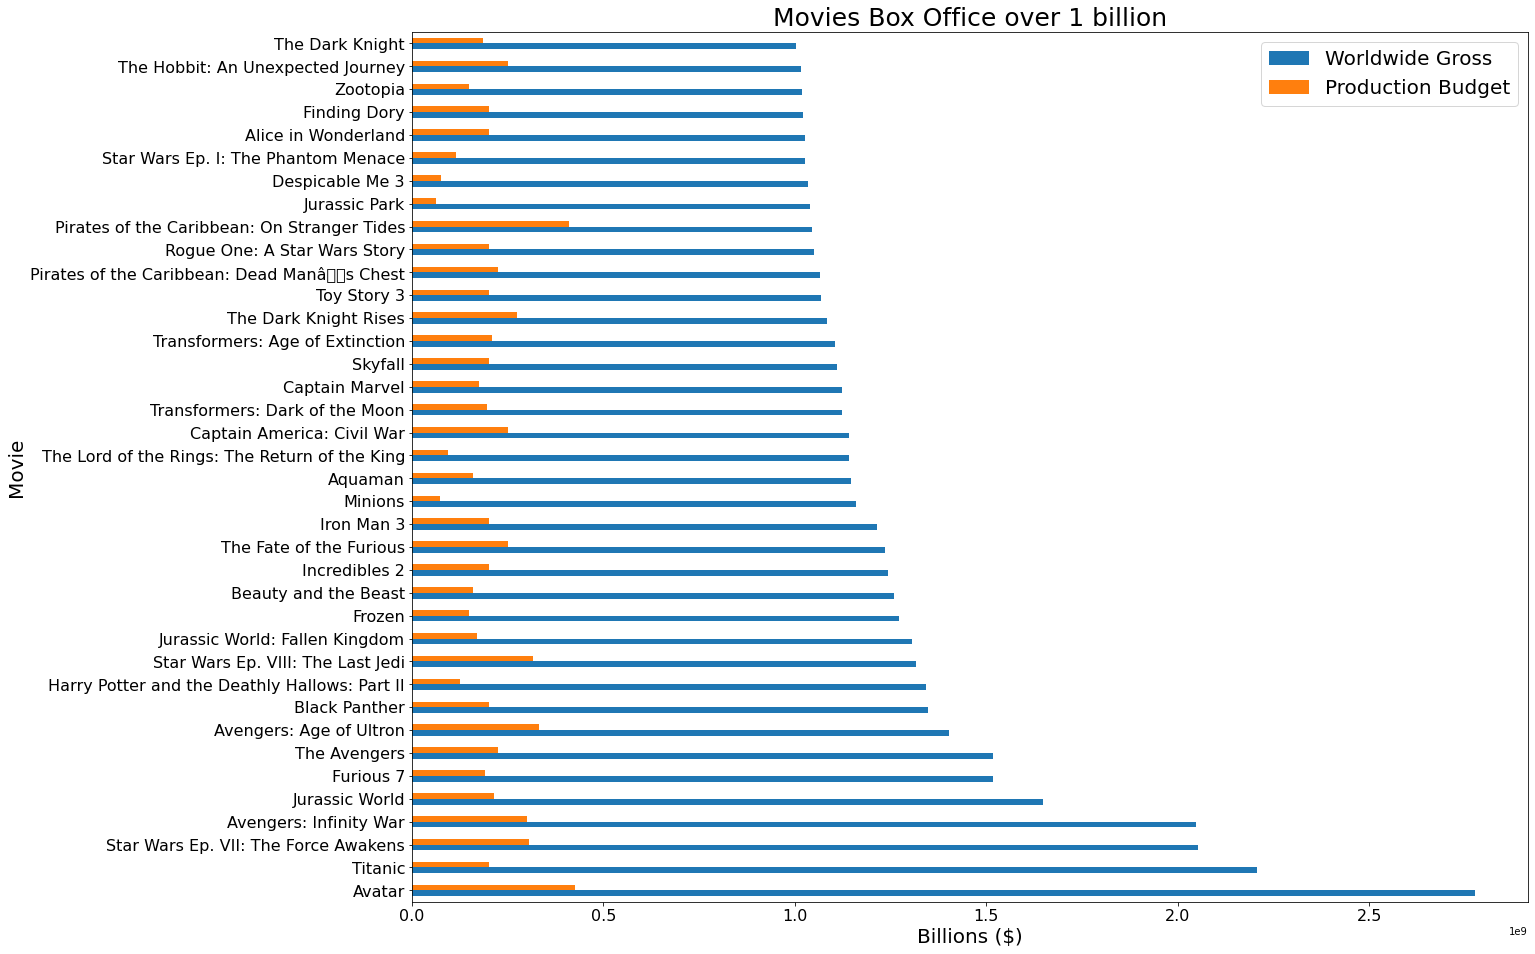

In [11]:
# In this step, a comparative chart between the productions is drawn.

df1_plot = pd.DataFrame({'Worldwide Gross': df1_profit_movies['worldwide_gross'].tolist(),
                         'Production Budget':df1_profit_movies['production_budget'].tolist()},
                          index=df1_profit_movies['movie'])
ax = df1_plot.plot.barh(figsize=(20,16), fontsize= 16)
ax.set_title('Movies Box Office over 1 billion',  fontsize = 25)
ax.set_ylabel('Movie', fontsize = 20)
ax.set_xlabel('Billions ($)', fontsize= 20)
ax.legend(loc= 'upper right', prop={'size':20});

Only 38 films throughout the history of cinema have reached more than 1 billion dollars. Of these films the average for the Worldwide_gross variable is approximately 1.3 billion dollars and for the Production_budget variable it is approximately 207 million dollars. It would also be important to mention that from this list of films the ratio between the collection and the value of the investment is approximately 7, so it would be expected that making an investment of this magnitude for a production could guarantee a profit of 7 times the investment.

Another important analysis would be to obtain the correlation between the budget allocated to film production and the collection. In this case, not only the highest-grossing movies would be taken because it would be a biased analysis, but all the productions available in the data would be taken.

Correlation between Production budget/Worldwide groos:


0.7483059765694753

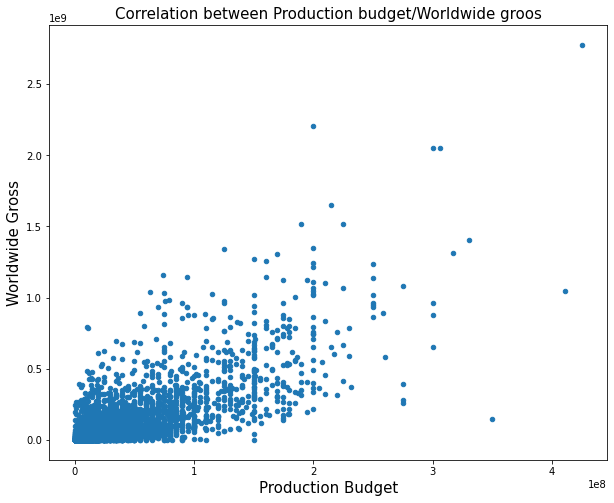

In [14]:
df1_plot2 = df1.plot('production_budget','worldwide_gross', kind='scatter', figsize=(10,8))
df1_plot2.set_xlabel('Production Budget', fontsize=15)
df1_plot2.set_ylabel('Worldwide Gross', fontsize=15);
df1_plot2.set_title('Correlation between Production budget/Worldwide groos', fontsize=15)

print(f'Correlation between Production budget/Worldwide groos:') 
df1['production_budget'].corr(df1['worldwide_gross'])

For the previous graph, it can be seen that there is a positive trend as it moves towards the positive side of the x-axis. In fact, the correlation between the two variables is 0.748 positive, which indicates that both variables are directly proportional, concluding that as more resources are devoted, the possibility of having a box office success is greater.

Now it is time for a more general analysis. It will try to make a separation by categories according to gender and see which genres are preferred by the audience. For this, the movie_basics_and_ratings and df1 dataframe will be used.

In [16]:
# Both dataframes will be joined and those duplicate values will be eliminated.
merge_datas = pd.merge(movie_basics_and_ratings, df1, left_on='primary_title', right_on='movie')
merge_data = merge_datas.drop_duplicates(subset=['worldwide_gross','production_budget'])

In [17]:
# Now the resulting dataframe is reduced in columns of interest
merge_data_reduce = merge_data.loc[:, ['genres', 'worldwide_gross', 'production_budget']]

In [18]:
# In this step, the films are grouped according to their genre 
# and the average production budget and worldwide gross are obtained 
# in order to know which genres have been the most successful.
profit_by_gender = merge_data_reduce.groupby(by=['genres']).mean()
profit_by_gender_sorted = profit_by_gender.sort_values(['worldwide_gross'], ascending=False)
#profit_by_gender_sorted.head(10)

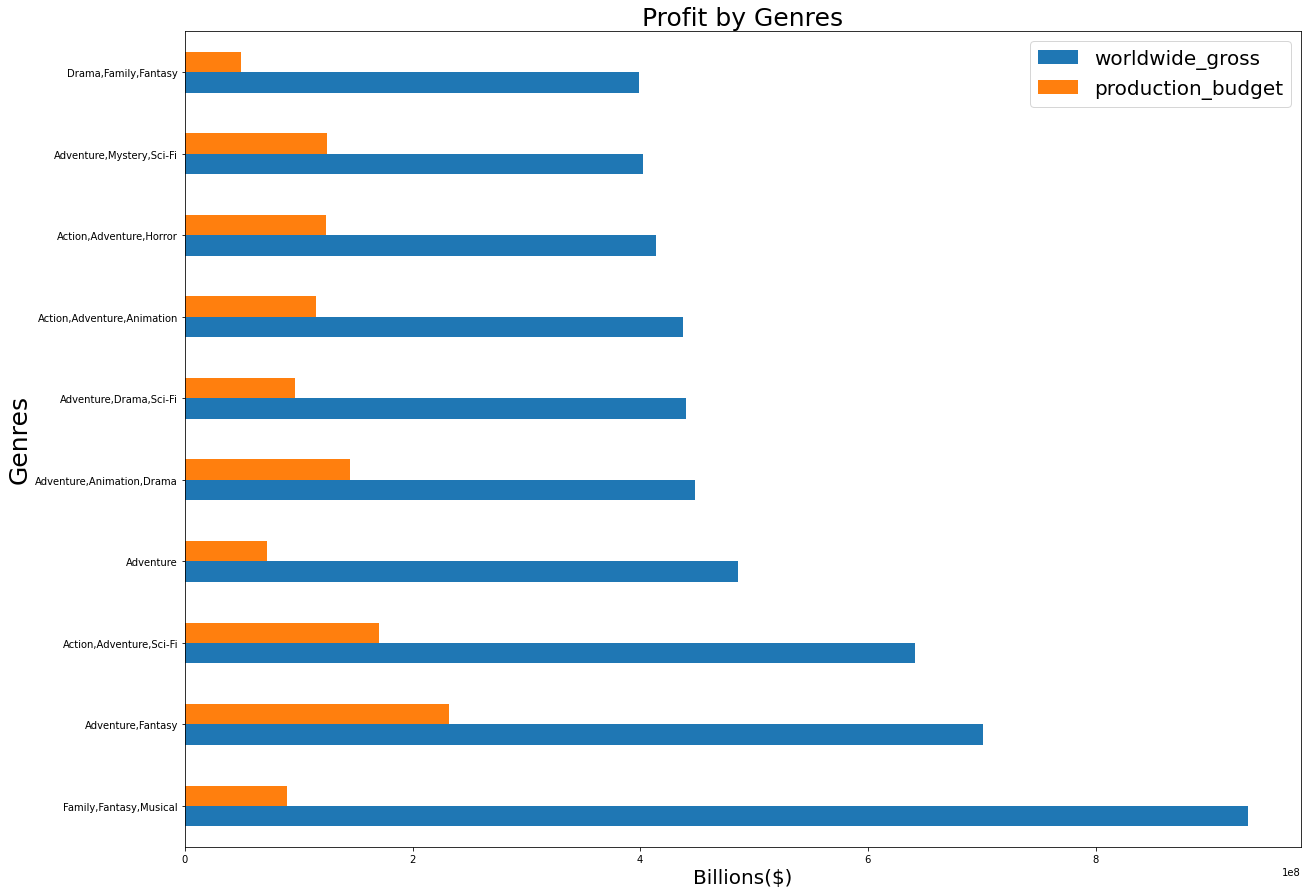

In [22]:
# The comparative table is made between the 10 most profitable genres.
profit_by_gender_plot = profit_by_gender_sorted.head(10).plot.barh(figsize=(20,15))
profit_by_gender_plot.set_title('Profit by Genres', fontsize=25)
profit_by_gender_plot.set_xlabel('Billions($)', fontsize= 20)

profit_by_gender_plot.set_ylabel('Genres', fontsize=25)
profit_by_gender_plot.legend(loc= 'upper right', prop={'size':20});

As can be seen in the previous figure, the categories are combinations of genres, so they will be treated as such.

Now that the most lucrative genres to make a movie have been determined, a director with experience and better qualifications in some of the mentioned genres should be chosen.

In [24]:
# The imdb database will be used again for this case adding the information of the directors.
q = """
SELECT primary_name, primary_profession, primary_title
FROM persons
JOIN directors
    USING(person_id)
JOIN movie_basics
    USING(movie_id)
JOIN movie_ratings
    USING(movie_id);
"""
pd.read_sql(q, conn)
directors = pd.read_sql(q, conn)

In [25]:
# In this step, the new dataframe 'directors' are joined together with the 'merge_data' to join the information.
directors_and_merge = pd.merge(directors,merge_data,on='primary_title', how='inner').drop_duplicates(subset=['worldwide_gross', 'production_budget'])

In [26]:
# Now the information is ordered according to the qualification obtained
#by the films directed by the directors.
directors_rating = directors_and_merge.sort_values(['averagerating'], ascending=False)

In [27]:
# From this  point on, the information of the directors will be searched
# of the ten most profitable genders previously known 
# in the dataframe profit_by_gender_sorted.head(10)

# Directors for Family,Fantasy,Musical 
directors_for_FFM = directors_rating.loc[directors_and_merge['genres'] == 'Family,Fantasy,Musical']
# Director for Adventure,Fantasy
directors_for_AF = directors_rating.loc[directors_and_merge['genres'] == 'Adventure,Fantasy']
# Director for Action,Adventure,Sci-Fi
directors_for_AAS = directors_rating.loc[directors_and_merge['genres'] == 'Action,Adventure,Sci-Fi']
# Director for Adventure
directors_for_adventure = directors_rating.loc[directors_and_merge['genres'] == 'Adventure']
# Director for Adventure,Animation,Drama
directors_for_AAD = directors_rating.loc[directors_and_merge['genres'] == 'Adventure,Animation,Drama']
# Director for Adventure,Drama, Sci-fi
directors_for_ADS = directors_rating.loc[directors_and_merge['genres'] == 'Adventure,Drama,Sci-Fi']
# Action,Adventure,Animation
directors_for_AAA = directors_rating.loc[directors_and_merge['genres'] == 'Action,Adventure,Animation']
# Action,Adventure,Horror
directors_for_AAH = directors_rating.loc[directors_and_merge['genres'] == 'Action,Adventure,Horror']
#Adventure,Mystery,Sci-Fi
directors_for_AMS = directors_rating.loc[directors_and_merge['genres'] == 'Adventure,Mystery,Sci-Fi']
#Drama,Family,Fantasy
directors_for_DFF = directors_rating.loc[directors_and_merge['genres'] == 'Drama,Family,Fantasy']


The concat function is now used to join the dataframes together and sort them according to rating to determine the highest-rated director.

In addition, since the Microsoft studio aims to make a large initial investment, it can be established that the director to be selected must handle high budgets, so, at a minimum, we can establish a criterion of 100 million dollars to know which directors have experience in large projects.

In [28]:
director_hire = pd.concat([directors_for_FFM,
                            directors_for_AF,
                           directors_for_AAS,
                           directors_for_adventure,
                           directors_for_AAD,
                           directors_for_ADS,
                           directors_for_AAA,
                           directors_for_AAH,
                           directors_for_AMS,
                           directors_for_DFF], axis=0)
director_hire_sorted = director_hire[director_hire['production_budget'] > 100000000].sort_values('averagerating', ascending=False)

In [29]:
# The following code should return the best-qualified director to lead the Microsoft Studios project.
director_hire_sorted.head(1)
director_selected = director_hire_sorted['primary_name'].head(1)
director_selected

732    Christopher Nolan
Name: primary_name, dtype: object

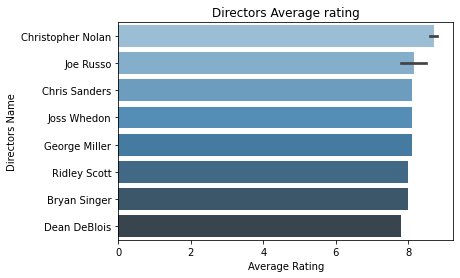

In [30]:
# The following diagram shows a list of the directors considered 
#according to the criteria used throughout the analysis.  

plot = sns.barplot(x='averagerating', y='primary_name', data=director_hire_sorted.head(10),
                   palette="Blues_d")
sns.set(rc={'figure.figsize':(15,8)})
plot.set_title('Directors Average rating')
plot.set_xlabel('Average Rating')
plot.set_ylabel('Directors Name');

To conclude, the analysis made of the available data together with the initially proposed objectives gives the result that the most convenient for Microsoft Studios will be to authorize a film project with a budget of around 207 million dollars, preferably of the Action, Adventure, Science-fiction genre and with Mr. Christopher Nolan to direct the project.

The creative licenses owned by Microsoft that are compatible with the results of the analysis are Halo, Metal Gear and Forza Horizon.

In [31]:
conn.close()